<a href="https://colab.research.google.com/github/wendyfqm19/Aprendizaje-Autom-tico/blob/main/Aprendizaje%20Autom%C3%A1tico%3A%20Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

### **Principios de aprendizaje automático**
###Tarea # 2
### **Integrantes** 
**
Wendy Quesada y Simón Quesada 



---

El fuego es un desastre natural que puede ser causado por muchas razones diferentes. A continuación vemos los datos obtenidos de un sistema de extinción de incendios mediante ondas sonoras, basado en el paper: [Determining the Extinguishing Status of Fuel Flames With Sound Wave](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9452168) . Con los datos obtenidos de esta investigación se obtuvieron un total de 17.442 pruebas de las siguientes features:
$$ $$
SIZE: 
$$ $$
FUEL: Tipo de combustible (Gasoline, Kerosene, Thinner)
$$ $$
DISTANCE: Distancia a la llama del extintor sonoro.	
$$ $$
DESIBEL: Presión sonora utilizada para apagar el fuego.
$$ $$
AIRFLOW	: Flujo de aire
$$ $$
FREQUENCY	: Frecuencia del sonido.
$$ $$
STATUS: Estado del fuego (1: se apagó, 0 : sigue encendido)

---

Importamos las librerías necesarias para aplicar los métodos de clasificación 

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importamos nuestra base de datos directamente desde GITHUB

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/wendyfqm19/Aprendizaje-Autom-tico/main/Acoustic_Extinguisher_Fire_Dataset.csv', sep=';')

La base de datos tiene 17442 instancias y 7 columnas

In [46]:
data.shape

(17442, 7)

La base de datos no presenta valores nulos

In [47]:
#Revisamos nuestra base de datos para determinar si está limpia
#La base de datos no tiene datos tipo NAN/Null.
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Analizamos los datos y extraimos algunos estadísticos para darnos cuenta del promedio, media, desviación estándar, y percentiles para darnos una idea de la distribución de los datos y ver si no hay un dato fuera de lo normal. 

In [48]:
pd.DataFrame(data).describe()

,SIZE,DISTANCE,DESIBEL,FREQUENCY,STATUS
count,17442.000000,17442.000000,17442.000000,17442.000000,17442.000000
mean,3.411765,100.000000,96.379142,31.611111,0.497821
std,1.750977,54.773826,8.164096,20.939149,0.500010
min,1.000000,10.000000,72.000000,1.000000,0.000000
25%,2.000000,50.000000,90.000000,14.000000,0.000000
50%,3.000000,100.000000,95.000000,27.500000,0.000000
75%,5.000000,150.000000,104.000000,47.000000,1.000000
max,7.000000,190.000000,113.000000,75.000000,1.000000


Se identifica qué tipo de datos contienen los atributos de la base de datos. Nótese que fuel y object son tipo  object y los otros atributos son numeros enteros. 

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SIZE       17442 non-null  int64 
 1   FUEL       17442 non-null  object
 2   DISTANCE   17442 non-null  int64 
 3   DESIBEL    17442 non-null  int64 
 4   AIRFLOW    17442 non-null  object
 5   FREQUENCY  17442 non-null  int64 
 6   STATUS     17442 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 954.0+ KB


In [50]:
print(data['FUEL'].unique())

['gasoline' 'thinner' 'kerosene' 'lpg']


In [51]:
#Modificamos los atributos tipo STRING a un valor entre 0 y 3. 
data['FUEL']=data['FUEL'].replace({'gasoline': 0, 'kerosene' :1, 'thinner' :2, 'lpg' :3})

In [52]:
#Ahora se puede notar que ahora ya se realizó el cambió anterior.
print(data['FUEL'].unique())

[0 2 1 3]


In [53]:
# Cambiamos commas a puntos en AirFlow

data['AIRFLOW']=data['AIRFLOW'].str. replace(',', '.')

In [54]:
#Se cambia la variable Airflow a tipo numérica

data['AIRFLOW'] = data['AIRFLOW'].astype(float, errors = 'raise')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  int64  
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 954.0 KB


Obtenemos la matriz de correlación para profundizar en los datos y ver la relación entre ellos

In [56]:
correlation_matrix = data.corr()
correlation_matrix

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
SIZE,1.000000e+00,4.142890e-01,-2.437871e-15,-6.125585e-15,1.677898e-16,9.978281e-17,-0.096947
FUEL,4.142890e-01,1.000000e+00,-1.805764e-15,-1.314009e-14,-8.603500e-16,-4.801738e-16,-0.001151
DISTANCE,-2.437871e-15,-1.805764e-15,1.000000e+00,-2.385897e-01,-7.074906e-01,-2.452947e-17,-0.644051
DESIBEL,-6.125585e-15,-1.314009e-14,-2.385897e-01,1.000000e+00,3.769153e-01,5.617409e-01,0.203970
AIRFLOW,1.677898e-16,-8.603500e-16,-7.074906e-01,3.769153e-01,1.000000e+00,-2.120462e-01,0.760628
FREQUENCY,9.978281e-17,-4.801738e-16,-2.452947e-17,5.617409e-01,-2.120462e-01,1.000000e+00,-0.244203
STATUS,-9.694718e-02,-1.151423e-03,-6.440506e-01,2.039698e-01,7.606279e-01,-2.442030e-01,1.000000


In [57]:
#Se puede apreciar que las variable size y frequency estan muy relacionadas
#Asi como correlaciones negativas entre algunas variables. 

## **Metodos de ensamble y cuáles son sus principales características.**

Los métodos de ensable intentan ayudar a mejorar el rendimiento intentan ayudar a mejorar el rendimiento de los modelos de Machine Learning al mejorar su precisión. Este es un modelo en que se construyen estratégicamente varios modelos de Machine Learning para resolver un problema particular. 
Otra manera de decirlo es el arte de combinar un conjunto de diversos modelos, para improvisar sobre la estabilidad y el poder predictivo del modelo. 
Características:
-El supuesto es que todas las predicciones son completamente independientes. 
-Combina predicciones de varios modelos, promedia errores y produce mejores precciones generales. 

Algunos son: Random Forest, agregación Bootstrap o Bagging, Stacking

El problema al que nos enfrentamos es de clasificación. Se intentará predecir la variable: "Status", el cual dadas las características de size, fuel, distance, airflow y frequency predecir el estado del fuego (1: se apagó, 0 : sigue encendido)

Se procederá a usar los siguientes modelos: KNN, árboles de decisión, máquinas de soporte vectorial.

Vamos a definir las features, el target, y la divisón de los datos. Para usar los mismos datos de entrenamiento y testeo en todos los modelos y proceder a hacer la comparación.

In [58]:
#Definimos las features que utilizaremos para nuestro modelo
features = data[['SIZE','FUEL','DISTANCE', 'AIRFLOW', 'FREQUENCY']]

In [59]:
#Definimos nuestra predicción meta
labels = data['STATUS']

In [60]:
#importamos la librería que nos permite hacer una correcta división de los datos
from sklearn.model_selection import train_test_split

In [61]:
#Creamos el set de datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(features,labels, random_state=13) 

In [62]:
#Se asegura que la divisón sea la deseada 
X_train.shape

(13081, 5)

In [63]:
X_test.shape

(4361, 5)

In [64]:
y_train.shape

(13081,)

In [65]:
y_test.shape

(4361,)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np

**# MODELO: ÁRBOLES DE DECISIÓN.**





In [67]:
from sklearn.tree import DecisionTreeClassifier

Se va a proceder a hacer un ciclo para ver cuál es profundidad del árbol que muestra mejor ajuste. 

In [68]:
df= pd.DataFrame()
df['Profundidad'] = None
df['Accuracy'] = None
df['Error'] = None

for profundidad in range(1,31):
  #Se guarda el modelo que se va a usar: árboles de decisión de clasificación
  DecisionTreeModel = DecisionTreeClassifier(max_depth =profundidad)
  DecisionTreeModel.fit(X_train,y_train)
  y_predict = DecisionTreeModel.predict(X_test)
  accuracy = accuracy_score(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  rmse = sqrt(mse)
  nueva_fila = { 'Profundidad': profundidad, 'Accuracy': accuracy, 'Error': rmse }
  df = df.append(nueva_fila, ignore_index=True)


                      

In [69]:
 df

,Profundidad,Accuracy,Error
0,1.0,0.861041,0.372772
1,2.0,0.861041,0.372772
2,3.0,0.849346,0.388141
3,4.0,0.883054,0.341973
4,5.0,0.898418,0.318720
5,6.0,0.907361,0.304367
6,7.0,0.920660,0.281673
7,8.0,0.942444,0.239907
8,9.0,0.942903,0.238950
9,10.0,0.950470,0.222553


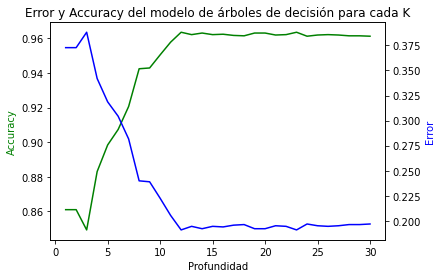

In [70]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df.Profundidad,df.Accuracy,'g-')
ax2.plot(df.Profundidad,df.Error,'b-')
 
ax1.set_xlabel("Profundidad")
ax1.set_ylabel("Accuracy",color='g')
 
ax2.set_ylabel("Error",color='b')

plt.title("Error y Accuracy del modelo de árboles de decisión para cada K")
 
plt.show()

Se puede notar que alrededor de 15 de profundidad se puede obtener aproximadamente 96% de accuracy y 0.19 de error.

Vamos a mander el modelo el 15 de profundidad y ver otras medidas para evaluar el modelo. 


In [71]:
 DecisionTreeModel = DecisionTreeClassifier(max_depth =15)
 DecisionTreeModel.fit(X_train,y_train)
 y_predict = DecisionTreeModel.predict(X_test)
 accuracy = accuracy_score(y_test, y_predict)
 accuracy 
                           

0.962393946342582

Vamos a utilizar la matriz de confusión, la cual es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

---



In [72]:
confusion_matrix(y_test, y_predict)

array([[2143,   82],
       [  82, 2054]])

Con la matriz de confusión se pueden calcular diferentes métricas las cuales explicaremos acontinuación: 

*   Exactitud o accuracy: es el porcentaje de predicciones correctas
*   Precisión: el porcentaje de casos positivos que se detectaron correctamente. En este caso el porcentaje de casos que se detectaron como 1 correctamente
*  La sensibilidad o "recall" se representa como la fracción de verdaderos positivos del total de casos, por ejemplo: En el área de la salud se dice  que la sensibilidad es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos. 

* Específicidad: la fracción de verdaderos negativos del total de casos. Por ejemplo, En el area de la salud se dice que la especificidad es la capacidad de poder identificar los casos de pacientes sanos entre todos los sanos)
Mediciones de la precisión de una prueba
*  F1 SCORE: El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.Puede tener una puntuación máxima de 1 (precisión y recuerdo perfectos) y una mínima de 0. En general, es una medida de la precisión y robustez de su modelo.

Fuente: https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python

Vamos a calcular alguna de estas medidas. 


In [73]:
print("La precisión con árboles de desición y una profundidad de 15 es:", precision_score(y_test, y_predict))

La precisión con árboles de desición y una profundidad de 15 es: 0.9616104868913857


In [74]:
print("La sensibilidad  con árboles de desición y una profundidad de 15 es:", recall_score(y_test, y_predict))

La sensibilidad  con árboles de desición y una profundidad de 15 es: 0.9616104868913857


In [75]:
print("El F1 SCORE es con árboles de desición y una profundidad de 15 es:", f1_score(y_test, y_predict))

El F1 SCORE es con árboles de desición y una profundidad de 15 es: 0.9616104868913857


In [76]:
print("Un resumen de medidas para evaluar el modelo")

print(classification_report(y_test, y_predict))

Un resumen de medidas para evaluar el modelo
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2225
           1       0.96      0.96      0.96      2136

    accuracy                           0.96      4361
   macro avg       0.96      0.96      0.96      4361
weighted avg       0.96      0.96      0.96      4361



En general se puede ver que el modelo se puede decir que predice 96% correctamente

Ahora vamos a ver cuáles de las variables que ingresamos al modelo realmente ayudana a la predicción. 

In [77]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':DecisionTreeModel.feature_importances_})

In [78]:
importances = importances.sort_values('importance', ascending = False).set_index('feature')

In [79]:
print("AIRFLOW, FREQUENCY Y SIZE son las variables que más ayudan a predicir el modelo. Si quisierámos ahorrar cálculo computacional podríamos intentarlo sin distance y fuel")

importances.head(9)

AIRFLOW, FREQUENCY Y SIZE son las variables que más ayudan a predicir el modelo. Si quisierámos ahorrar cálculo computacional podríamos intentarlo sin distance y fuel


,importance
feature,
AIRFLOW,0.637641
SIZE,0.108279
FREQUENCY,0.106919
DISTANCE,0.076313
FUEL,0.070848


** MODELO: KKN.**

In [80]:
from sklearn.neighbors import KNeighborsClassifier

Se va a proceder a hacer un ciclo para ver cuál K-vecinos que muestra mejor ajuste. 

In [81]:
df= pd.DataFrame()
df['Vecinos'] = None
df['Accuracy'] = None
df['Error'] = None

for K in range(1,25):
  #Se guarda el modelo que se va a usar: árboles de decisión de clasificación
  knn_model = KNeighborsClassifier(n_neighbors=K)
  knn_model.fit(X_train, y_train)
  y_predict = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  rmse = sqrt(mse)
  nueva_fila = { 'Vecinos': K, 'Accuracy': accuracy, 'Error': rmse}
  df = df.append(nueva_fila, ignore_index=True)


In [82]:
df

,Vecinos,Accuracy,Error
0,1.0,0.896813,0.321228
1,2.0,0.905756,0.306993
2,3.0,0.933960,0.256982
3,4.0,0.927769,0.268759
4,5.0,0.930750,0.263154
5,6.0,0.925705,0.272571
6,7.0,0.928457,0.267476
7,8.0,0.924100,0.275500
8,9.0,0.922266,0.278809
9,10.0,0.921807,0.279630


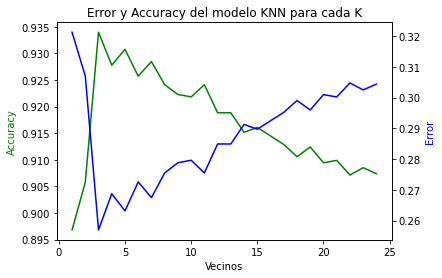

In [83]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df.Vecinos,df.Accuracy,'g-')
ax2.plot(df.Vecinos,df.Error,'b-')
 
ax1.set_xlabel("Vecinos")
ax1.set_ylabel("Accuracy",color='g')
 
ax2.set_ylabel("Error",color='b')

plt.title("Error y Accuracy del modelo KNN para cada K")
 
plt.show()
 

Se puede notar que alrededor de 3 vecinos se puede obtener aproximadamente 93.5% de accuracy y el mínimo error de 0.25. 

Vamos a mantener el modelo con 3 vecinos  y ver otras medidas para evaluar el modelo. 

In [84]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.9339601008942903

In [85]:
print("La matriz de confusión es: ")
confusion_matrix(y_test, y_predict)

La matriz de confusión es: 


array([[2099,  126],
       [ 162, 1974]])

In [86]:
print("Un resumen de medidas para evaluar el modelo. Por favor, interpretar estos datos de la misma forma que se explicó en el modelo anterior")

print(classification_report(y_test, y_predict))

Un resumen de medidas para evaluar el modelo. Por favor, interpretar estos datos de la misma forma que se explicó en el modelo anterior
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2225
           1       0.94      0.92      0.93      2136

    accuracy                           0.93      4361
   macro avg       0.93      0.93      0.93      4361
weighted avg       0.93      0.93      0.93      4361



** MODELO: Máquina de Soporte Vectorial.**


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [24]:
df= pd.DataFrame()
df['C'] = None
df['Accuracy'] = None
df['Error'] = None

for C in range(1,15):
  #Se guarda el modelo que se va a usar: árboles de decisión de clasificación
  svc_modelo = SVC(C = C, kernel = 'linear', random_state=1)
  svc_modelo.fit(X_train, y_train)
  y_predict = svc_modelo.predict(X_test)
  accuracy = accuracy_score(y_test, y_predict)
  mse = mean_squared_error(y_test, y_predict)
  rmse = sqrt(mse)
  nueva_fila = { 'C': C, 'Accuracy': accuracy, 'Error': rmse}
  df = df.append(nueva_fila, ignore_index=True)

Ahora vamos a utilizar el método de ensamble: Bagging. La idea del algoritmo de Bagging, consiste en entrenar modelos de forma independiente y después combinar sus resultados. Para clasificación se obtendría el voto por mayoría de cada algoritmo (la moda). 



In [25]:
df

,C,Accuracy,Error
0,1.0,0.869067,0.361847
1,2.0,0.868608,0.362480
2,3.0,0.865398,0.366882
3,4.0,0.867691,0.363743
4,5.0,0.868379,0.362796
5,6.0,0.870672,0.359622
6,7.0,0.869755,0.360895
7,8.0,0.869525,0.361213
8,9.0,0.869296,0.361530
9,10.0,0.869296,0.361530


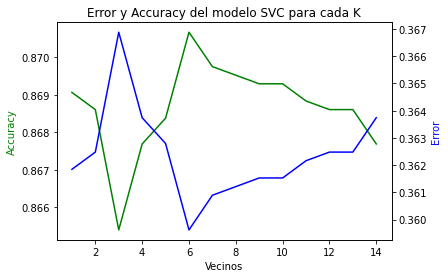

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df.C,df.Accuracy,'g-')
ax2.plot(df.C,df.Error,'b-')
 
ax1.set_xlabel("Vecinos")
ax1.set_ylabel("Accuracy",color='g')
 
ax2.set_ylabel("Error",color='b')

plt.title("Error y Accuracy del modelo SVC para cada K")
 
plt.show()
 

Se puede notar que alrededor de C (médida de generalización) iguala a 6  se puede obtener aproximadamente 86% de accuracy y el mínimo error de 0.35. 

Vamos a mantener el modelo con C igual a 3  y ver otras medidas para evaluar el modelo. 

In [28]:
print("La matriz de confusión es: ")
confusion_matrix(y_test, y_predict)

La matriz de confusión es: 


array([[2011,  214],
       [ 363, 1773]])

In [29]:
print("Un resumen de medidas para evaluar el modelo. Por favor, interpretar estos datos de la misma forma que se explicó en el modelo anterior")

print(classification_report(y_test, y_predict))

Un resumen de medidas para evaluar el modelo. Por favor, interpretar estos datos de la misma forma que se explicó en el modelo anterior
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2225
           1       0.89      0.83      0.86      2136

    accuracy                           0.87      4361
   macro avg       0.87      0.87      0.87      4361
weighted avg       0.87      0.87      0.87      4361



MODELO DE ENSAMBLE: BAGGING 

Ede conjunto que ajusta cada uno de los regresores base en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales (ya sea votando o promediando) para formar una predicción final. Este tipo se puede utilizar normalmente como una forma de reducir la varianza de un modelo simple (por ejemplo, un árbol de decisiones), introduciendo la aleatorización en su procedimiento de construcción y luego creando un conjunto a partir de él.

In [87]:
from sklearn.ensemble import BaggingClassifier

In [88]:
model = BaggingClassifier()
model.fit(X_train, y_train)
# make a single prediction
y_predict = model.predict(X_test)
print("El accuracy del modelo de ensamble Bagging es: ", accuracy_score(y_test, y_predict))
mse = mean_squared_error(y_test, y_predict)
rmse = sqrt(mse)
print("El error del modelo de ensamble Bagging es: ", rmse)



El accuracy del modelo de ensamble Bagging es:  0.9669800504471452
El error del modelo de ensamble Bagging es:  0.18171392228680458


Vemos que el accuracy y el error del modelo es muy buena y  similar a cuando se implementa árboles de decisión, estos son los mejores modelos para nuestra predicción del Status del fuego.

Probamos otro método de clasificación distinto:

Naive Bayes Classifier

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB

#model = GaussianNB()
#model.fit(X_train,y_train)

GaussianNB()

In [ ]:
#model.score(X_train,y_train)

0.8752388961088602